In [9]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, Dataset, random_split
import torch.optim  as optim
import numpy as np
import matplotlib.pyplot as plt
import time
from copy import deepcopy

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.backends.cudnn.enabled = False

In [2]:
name = ['cyj', 'cyy', 'jh','jsp','sbs','usb','shc']
task = ['10','20','1back','3back']

In [7]:
df = pd.read_csv(path.format('cyj', '10'), header=1)

In [8]:
df

,Timestamp,OriginalTimestamp,EEG.Counter,EEG.Interpolated,EEG.Cz,EEG.Fz,EEG.Fp1,EEG.F7,EEG.F3,EEG.FC1,...,POW.F8.Theta,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.Fp2.Theta,POW.Fp2.Alpha,POW.Fp2.BetaL,POW.Fp2.BetaH,POW.Fp2.Gamma
0,1.677475e+09,1.677475e+09,72.0,0.0,-74.807449,-47.118988,-298.858795,-223.294235,-23.400721,39.923599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.677475e+09,1.677475e+09,73.0,0.0,-61.924950,-35.288792,-275.506104,-195.918640,-9.032704,54.228291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.677475e+09,1.677475e+09,74.0,0.0,-62.887642,-34.741196,-268.570587,-204.944260,-10.048286,49.563293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.677475e+09,1.677475e+09,75.0,0.0,-68.460136,-42.903378,-286.745087,-222.670074,-16.185930,40.804497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.677475e+09,1.677475e+09,76.0,0.0,-66.342445,-43.372780,-290.044495,-207.590485,-13.608207,46.399078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38871,1.677475e+09,1.677475e+09,19.0,0.0,-83.793793,34.405994,-8.649510,66.408989,-8.361818,-53.249050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38872,1.677475e+09,1.677475e+09,20.0,0.0,-104.714615,15.416203,-27.083939,41.751808,-29.358072,-71.638878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38873,1.677475e+09,1.677475e+09,21.0,0.0,-99.999138,21.036171,-27.056854,43.246979,-30.353329,-65.419548,...,1.651306,1.054935,0.312376,0.217915,0.140695,1.818953,1.350139,0.55441,0.177159,0.186938
38874,1.677475e+09,1.677475e+09,22.0,0.0,-82.992981,31.261290,-15.246720,62.159119,-18.539898,-54.595665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
path = './{}/base/{}.csv'

In [4]:
eeg_col = ['EEG.Cz', 'EEG.Fz', 'EEG.Fp1',  'EEG.F7', 'EEG.F3', 'EEG.FC1', 'EEG.C3','EEG.FC5',
           'EEG.FT9', 'EEG.T7','EEG.CP5',  'EEG.CP1', 'EEG.P3', 'EEG.P7', 'EEG.PO9', 'EEG.O1',
           'EEG.Pz', 'EEG.Oz', 'EEG.O2', 'EEG.PO10', 'EEG.P8', 'EEG.P4', 'EEG.CP2', 'EEG.CP6',
           'EEG.T8', 'EEG.FT10', 'EEG.FC6', 'EEG.C4', 'EEG.FC2', 'EEG.F4', 'EEG.F8', 'EEG.Fp2']

In [5]:
fft_col = ['POW.Cz.Theta','POW.Cz.Alpha','POW.Cz.BetaL','POW.Cz.BetaH','POW.Cz.Gamma',
           'POW.Fz.Theta','POW.Fz.Alpha','POW.Fz.BetaL','POW.Fz.BetaH','POW.Fz.Gamma',
           'POW.Fp1.Theta','POW.Fp1.Alpha','POW.Fp1.BetaL','POW.Fp1.BetaH','POW.Fp1.Gamma',
           'POW.F7.Theta','POW.F7.Alpha','POW.F7.BetaL','POW.F7.BetaH','POW.F7.Gamma','POW.F3.Theta',
           'POW.F3.Alpha','POW.F3.BetaL','POW.F3.BetaH','POW.F3.Gamma','POW.FC1.Theta','POW.FC1.Alpha',
           'POW.FC1.BetaL','POW.FC1.BetaH','POW.FC1.Gamma','POW.C3.Theta','POW.C3.Alpha','POW.C3.BetaL',
           'POW.C3.BetaH','POW.C3.Gamma','POW.FC5.Theta','POW.FC5.Alpha','POW.FC5.BetaL','POW.FC5.BetaH',
           'POW.FC5.Gamma','POW.FT9.Theta','POW.FT9.Alpha','POW.FT9.BetaL','POW.FT9.BetaH','POW.FT9.Gamma',
           'POW.T7.Theta','POW.T7.Alpha','POW.T7.BetaL','POW.T7.BetaH','POW.T7.Gamma','POW.CP5.Theta',
           'POW.CP5.Alpha','POW.CP5.BetaL','POW.CP5.BetaH','POW.CP5.Gamma','POW.CP1.Theta','POW.CP1.Alpha',
           'POW.CP1.BetaL','POW.CP1.BetaH','POW.CP1.Gamma','POW.P3.Theta','POW.P3.Alpha','POW.P3.BetaL',
           'POW.P3.BetaH','POW.P3.Gamma','POW.P7.Theta','POW.P7.Alpha','POW.P7.BetaL','POW.P7.BetaH',
           'POW.P7.Gamma','POW.PO9.Theta','POW.PO9.Alpha','POW.PO9.BetaL','POW.PO9.BetaH','POW.PO9.Gamma',
           'POW.O1.Theta','POW.O1.Alpha','POW.O1.BetaL','POW.O1.BetaH','POW.O1.Gamma','POW.Pz.Theta',
           'POW.Pz.Alpha','POW.Pz.BetaL','POW.Pz.BetaH','POW.Pz.Gamma','POW.Oz.Theta','POW.Oz.Alpha',
           'POW.Oz.BetaL','POW.Oz.BetaH','POW.Oz.Gamma','POW.O2.Theta','POW.O2.Alpha','POW.O2.BetaL',
           'POW.O2.BetaH','POW.O2.Gamma','POW.PO10.Theta','POW.PO10.Alpha','POW.PO10.BetaL','POW.PO10.BetaH',
           'POW.PO10.Gamma','POW.P8.Theta','POW.P8.Alpha','POW.P8.BetaL','POW.P8.BetaH','POW.P8.Gamma',
           'POW.P4.Theta','POW.P4.Alpha','POW.P4.BetaL','POW.P4.BetaH','POW.P4.Gamma','POW.CP2.Theta',
           'POW.CP2.Alpha','POW.CP2.BetaL','POW.CP2.BetaH','POW.CP2.Gamma','POW.CP6.Theta','POW.CP6.Alpha',
           'POW.CP6.BetaL','POW.CP6.BetaH','POW.CP6.Gamma','POW.T8.Theta','POW.T8.Alpha','POW.T8.BetaL',
           'POW.T8.BetaH','POW.T8.Gamma','POW.FT10.Theta','POW.FT10.Alpha','POW.FT10.BetaL','POW.FT10.BetaH',
           'POW.FT10.Gamma','POW.FC6.Theta','POW.FC6.Alpha','POW.FC6.BetaL','POW.FC6.BetaH','POW.FC6.Gamma',
           'POW.C4.Theta','POW.C4.Alpha','POW.C4.BetaL','POW.C4.BetaH','POW.C4.Gamma','POW.FC2.Theta',
           'POW.FC2.Alpha','POW.FC2.BetaL','POW.FC2.BetaH','POW.FC2.Gamma','POW.F4.Theta','POW.F4.Alpha',
           'POW.F4.BetaL','POW.F4.BetaH','POW.F4.Gamma','POW.F8.Theta','POW.F8.Alpha','POW.F8.BetaL',
           'POW.F8.BetaH','POW.F8.Gamma','POW.Fp2.Theta','POW.Fp2.Alpha','POW.Fp2.BetaL','POW.Fp2.BetaH',
           'POW.Fp2.Gamma']

In [6]:
df = pd.read_csv(path.format('cyj', '10'),  header=1)

In [7]:
df['EEG.Counter'][500:37940]

500      60.0
501      61.0
502      62.0
503      63.0
504      64.0
         ... 
37935    19.0
37936    20.0
37937    21.0
37938    22.0
37939    23.0
Name: EEG.Counter, Length: 37440, dtype: float64

In [60]:
208 * 180

37440

In [21]:
def generation_lstm_data(path, name, task_list, eeg_col, fft_col, device):
    count = 0
    for t in task_list:
        print(t)
        if count == 0:
            df = pd.read_csv(path.format(name, t),  header=1)
            df_EEG = df[eeg_col][500:37940].reset_index(drop = True).values
            eeg_input = torch.tensor(df_EEG.reshape(180, 208, 32),
                                     dtype = float, device = device)
            df_fft = df[fft_col][500:37940].dropna().reset_index(drop = True).values
            fft_input = torch.tensor(df_fft.reshape(180, 13, 160),
                                     dtype = float, device = device)
            
            if t == '10' or t =='20': 
                output = torch.zeros((180,), device = device) + 1
            # elif 
            # t == '3back': output = torch.zeros(150,) + 2
            else: 
                output = torch.zeros((180,), device = device)
        else:
            df = pd.read_csv(path.format(name, t),  header=1)
            df_EEG = df[eeg_col][500:37940].reset_index(drop = True).values
            eeg_input = torch.cat([eeg_input, torch.tensor(df_EEG.reshape(180, 208, 32),
                                                           dtype = float, device = device)])
            
            df_fft = df[fft_col][500:37940].dropna().reset_index(drop = True).values
            fft_input = torch.cat([fft_input, torch.tensor(df_fft.reshape(180, 13, 160),
                                                           dtype = float, device = device)])
            
            if t == '10' or t == '20':
                output = torch.cat([output, torch.zeros((180,), device = device) + 1])
            # elif 
            # t == '3back': output = torch.cat([output, torch.zeros(100,) + 2])
            else: 
                output = torch.cat([output, torch.zeros((180,), device = device)])
                
        count += 1
    
    return eeg_input, fft_input, output 

In [22]:
cyj_lstm_eeg_input, cyj_lstm_fft_input, cyj_lstm_output = generation_lstm_data(path, 'cyj', task, eeg_col, fft_col, device)

10
20
1back
3back


In [40]:
def generation_cnn_data(path, name, task_list, eeg_col, fft_col, device):
    count = 0
    for t in task_list:
        print(t)
        if count == 0:
            df = pd.read_csv(path.format(name, t),  header=1)
            df_EEG = df[eeg_col][500:37940].reset_index(drop = True).values
            eeg_input = torch.tensor(df_EEG.reshape(180, 32, 208),
                                     dtype = float, device = device)
            df_fft = df[fft_col][500:37940].dropna().reset_index(drop = True).values
            fft_input = torch.tensor(df_fft.reshape(180, 160, 13),
                                     dtype = float, device = device)
            
            if t == '10' or t =='20': 
                output = torch.zeros((180,), device = device) + 1
            # elif 
            # t == '3back': output = torch.zeros(150,) + 2
            else: 
                output = torch.zeros((180,), device = device)
        else:
            df = pd.read_csv(path.format(name, t),  header=1)
            df_EEG = df[eeg_col][500:37940].reset_index(drop = True).values
            eeg_input = torch.cat([eeg_input, torch.tensor(df_EEG.reshape(180, 32, 208),
                                                           dtype = float, device = device)])
            
            df_fft = df[fft_col][500:37940].dropna().reset_index(drop = True).values
            fft_input = torch.cat([fft_input, torch.tensor(df_fft.reshape(180, 160, 13),
                                                           dtype = float, device = device)])
            
            if t == '10' or t == '20':
                output = torch.cat([output, torch.zeros((180,), device = device) + 1])
            # elif 
            # t == '3back': output = torch.cat([output, torch.zeros(100,) + 2])
            else: 
                output = torch.cat([output, torch.zeros((180,), device = device)])
                
        count += 1
    
    return eeg_input, fft_input, output 

In [41]:
cyj_cnn_eeg_input, cyj_cnn_fft_input, cyj_cnn_output = generation_cnn_data(path, 'cyj', task, eeg_col, fft_col, device)

10
20
1back
3back


In [10]:
class LSTMEEG(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(LSTMEEG, self).__init__()
        
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, batch_first = True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
    

    def init_hidden(self, batch):
        '''Initialize hidden states for LSTM cell.'''
        device = self.lstm.weight_ih_l0.device
        return (torch.zeros(1, batch, self.hidden_dim, device=device),
                torch.zeros(1, batch, self.hidden_dim, device=device))
    
    def forward(self, X, hidden = None):
        if hidden is None:
            hidden = self.init_hidden(X.shape[0])
            
        lstm_out, (h, c) = self.lstm(X, hidden)
        y = self.fc(lstm_out[:, -1])
        y = self.sigmoid(y) # binary classification
        # y = self.softmax(y) # multi-class
        
        return y

In [11]:
class MakeDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor

    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

In [23]:
dataset = MakeDataset(cyj_lstm_eeg_input, cyj_lstm_output)

In [24]:
train_dataset, test_dataset = random_split(dataset, [600,120])

In [25]:
trainloader = DataLoader(train_dataset, 
                         batch_size=120, 
                         shuffle=True)

testloader = DataLoader(test_dataset,
                       batch_size = 120,
                       shuffle=True)

In [26]:
def restore_parameters(model, best_model):
    '''Move parameter values from best_model to model.'''
    for params, best_params in zip(model.parameters(), best_model.parameters()):
        params.data = best_params

def train_LSTMEEG(model, trainloader, epochs, lr, device):
    model.to(device)
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    history = {'loss' : []}
    
    best_it = None
    best_loss = np.inf
    best_model = None
    
    for epoch in range(epochs):
        losses = []
        for X, Y in trainloader:
            model.zero_grad()
            pred = model(X.float())
            loss = loss_fn(pred.squeeze(1), Y)
            
            loss.backward()
            optimizer.step()
            losses.append(float(loss))
        avg_loss = np.mean(losses)
        history['loss'].append(avg_loss)
        if (epoch + 1) % 10 == 0:
            print("Epoch {} / {}: Loss = {:.3f}".format(epoch+1, epochs, avg_loss))
        
        if best_loss > avg_loss:
            best_loss = avg_loss
            best_model =  deepcopy(model)
            
    restore_parameters(model, best_model)
    
    return history

In [30]:
model = LSTMEEG(32, 100)
his = train_LSTMEEG(model, trainloader, 100, 0.001, device= device)

Epoch 10 / 100: Loss = 0.481
Epoch 20 / 100: Loss = 0.344
Epoch 30 / 100: Loss = 0.248
Epoch 40 / 100: Loss = 0.188
Epoch 50 / 100: Loss = 0.148
Epoch 60 / 100: Loss = 0.122
Epoch 70 / 100: Loss = 0.106
Epoch 80 / 100: Loss = 0.084
Epoch 90 / 100: Loss = 0.071
Epoch 100 / 100: Loss = 0.064


In [31]:
def evaluation_eeglstm(model, train_data, test_data, batch_size, device):
    model.to(device)
    
    train_pred_list = []
    train_target_list = []
    test_pred_list = []
    test_target_list = []
    
    trainacc = 0
    testacc = 0
    loss_fn = nn.BCELoss()
    trainlosses = []
    testlosses = []
    
    for X, y, in train_data:
        pred = model(X.float())
        loss = loss_fn(pred.squeeze(1), y)
        
        trainlosses.append(float(loss))
        train_pred_list.append((pred.squeeze(1) >0.5).type(torch.float))
        train_target_list.append(y)
    trainavg_loss = np.mean(trainlosses) 
    
    for p, t in zip(train_pred_list, train_target_list):
        trainacc += torch.sum(torch.abs(p - t))
        
    print('Train dataset loss :', trainavg_loss)
    print('Train dataset acc :{}%'.format((((batch_size * len(train_data)) - trainacc) / 
                                          (batch_size * len(train_data))).item() *100 ))
    
    for X, y, in test_data:
        pred = model(X.float())
        loss = loss_fn(pred.squeeze(1), y)
        
        testlosses.append(float(loss))
        test_pred_list.append((pred.squeeze(1) >0.5).type(torch.float))
        test_target_list.append(y)
    testavg_loss = np.mean(testlosses)
    
    for p, t in zip(test_pred_list, test_target_list):
        testacc += torch.sum(torch.abs(p - t))
        
    print('Test dataset loss :', testavg_loss)
    print('Test dataset acc :{}%'.format((((batch_size * len(test_data)) - testacc) / 
                                          (batch_size * len(test_data))).item() *100 ))
    
    return train_pred_list, train_target_list, test_pred_list, test_target_list

In [32]:
train_pred_list, train_target_list, test_pred_list, test_target_list = evaluation_eeglstm(model, trainloader, testloader,50, device)

Train dataset loss : 0.06361919343471527
Train dataset acc :98.00000190734863%
Test dataset loss : 0.4782680571079254
Test dataset acc :43.99999976158142%


In [33]:
import shap

In [34]:
explainer_shap = shap.DeepExplainer(model, cyj_lstm_eeg_input.float()) 

In [35]:
shap_values = explainer_shap.shap_values(cyj_lstm_eeg_input.float())

Using non-full backward hooks on a Module that does not return a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_output. Please use register_full_backward_hook to get the documented behavior.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [36]:
shap.initjs()

shap.force_plot(explainer_shap.expected_value[0],
                shap_values[0],
                feature_names=eeg_col)

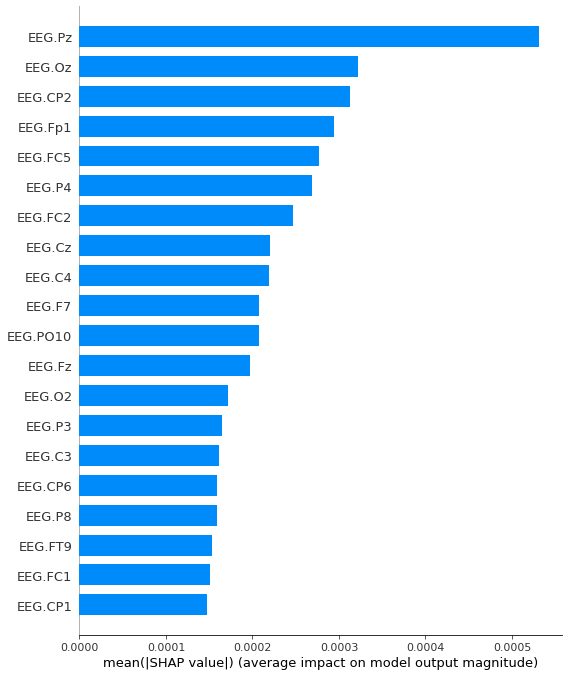

In [38]:
shap.summary_plot(shap_values[0], cyj_lstm_eeg_input.detach().cpu().numpy()[1], 
                  feature_names=eeg_col, plot_type='bar')

In [44]:
cyj_lstm_eeg_input.detach().cpu().numpy()[:100].shape

(100, 208, 32)

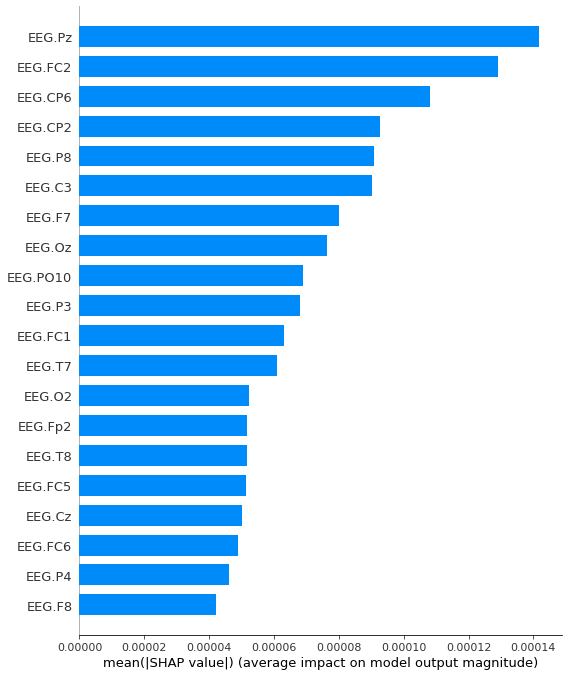

In [48]:
shap.summary_plot(shap_values[0], cyj_lstm_eeg_input.detach().cpu().numpy()[0], 
                  feature_names=eeg_col, plot_type='bar')